**Importing Libraries**

In [ ]:
import pandas as pd     #import all the necessary libraries for the text analysis
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm
import r
from textblob import TextBlob # it provides the dictionary for proprecessing textual data
import plotly.express as px

# Download NLTK resources
nltk.download('vader_lexicon')   #download the required packages
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))   #initializing the english stop words- common words

from sklearn.model_selection import train_test_split   #libraries for the classification model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Import the training dataset**

In [ ]:
df = pd.read_csv('AmazonReviews.csv')   #Importing the dataset into the pandas dataframe
df.head(10)

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...
5,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-30,4,I have been using this product for some time n...
6,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-28,1,I purchased both oil and shampoo after watchin...
7,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-20,5,It's a very good product from mamaearth. The o...
8,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-11-15,3,Why are you showing onion oil benefits in your...
9,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-30,5,I used it only one time so I can't say about h...


In [ ]:
df.shape  #dimensions of the dataset

(2782, 5)

## **Exploratery data analysis (EDA)**

In [ ]:
df.describe()  #statistical description of the data

,rating
count,2782.000000
mean,3.765636
std,1.577803
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df.info()   #features and data type description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2782 entries, 0 to 2781
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   asin    2782 non-null   object
 1   name    2782 non-null   object
 2   date    2782 non-null   object
 3   rating  2782 non-null   int64 
 4   review  2776 non-null   object
dtypes: int64(1), object(4)
memory usage: 108.8+ KB


In [ ]:
prod = df['name'].unique()    #unique product names
prod

array(['Mamaearth-Onion-Growth-Control-Redensyl',
       'Mamaearth-Percent-Natural-Berry-Toothpaste',
       'Mamaearth-Natural-Turmeric-Saffron-brightning',
       'Mamaearth-Illuminate-Vitamin-Radiant-Turmeric',
       'Mamaearth-Blemishes-Pigmentation-Blemish-Mulberry',
       'Mamaearth-Face-Wash-100-ml',
       'Mamaearth-Moisturizing-Baby-Bathing-Oatmeal',
       'Godrej-Protekt-Master-Blaster-Handwash',
       'Godrej-No-1-Bathing-Soap-Lime',
       'Godrej-No-1-Bathing-Soap-Turmeric',
       'Godrej-Direct-Cool-Refrigerator-1905-PTDI',
       'Godrej-aer-Pocket-Bathroom-Fragrance',
       'Godrej-Security-Solutions-SEEC9060-Electronic',
       'Godrej-Matic-Spray-Violet-Valley',
       'Godrej-Security-Solutions-Goldilocks-Personal',
       'Godrej-ViroShield-Disinfecting-VIROSHIELD-30UV',
       'Titan-Analog-Black-Dial-Watch-1805NM01',
       'Titan-Analog-White-Dial-Watch-NK1639SL03',
       'Titan-Karishma-Analog-Blue-Watch-1774SM01',
       'Titan-Karishma-Analog-Black-Wa

##**Data Preprocessing**

In [ ]:
col= 'asin'    #dropping unecessary column for the analysis
df.drop(col, axis=1, inplace=True)

In [ ]:
col1= 'date'
df.drop(col1, axis=1, inplace=True)

In [ ]:
df.isnull().sum()  #checking for the null values in the dataset

name      0
rating    0
review    6
dtype: int64

In [ ]:
#drops row will null values
df=df.dropna()

In [ ]:
stopwords = set(nltk.corpus.stopwords.words('english'))

def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        # Removing punctuations
        sentence = re.sub(r'[^\w\s]', '', sentence)

        # Converting lowercase and removing stopwords
        preprocessed_text.append(' '.join(token.lower() for token in nltk.word_tokenize(sentence) if token.lower() not in stopwords))

    return preprocessed_text

In [ ]:
preprocessed_review = preprocess_text(df['review'].values)   #printing the preproccesed reviews
df['review'] = preprocessed_review
df

100%|██████████| 2776/2776 [00:01<00:00, 1776.82it/s]


,name,rating,review
0,Mamaearth-Onion-Growth-Control-Redensyl,1,bought hair oil viewing many good comments pro...
1,Mamaearth-Onion-Growth-Control-Redensyl,5,used mama earth newly launched onion oil twice...
2,Mamaearth-Onion-Growth-Control-Redensyl,1,bad productmy hair falling increase muchi orde...
3,Mamaearth-Onion-Growth-Control-Redensyl,1,product smells similar navarathna hair oil str...
4,Mamaearth-Onion-Growth-Control-Redensyl,5,trying different onion oil hair hair healthy p...
...,...,...,...
2777,Mysore-Sandal-Soaps-Pack-Bars,5,long lasting freshness throughout day
2778,Mysore-Sandal-Soaps-Pack-Bars,5,preferred soap
2779,Mysore-Sandal-Soaps-Pack-Bars,2,ठक नह लग
2780,Mysore-Sandal-Soaps-Pack-Bars,4,super product


## **Dataset Formatting**

In [ ]:
def tokenize_product_name(name, delimiter='-'):   #function to retrun tokens of product name
    tokens = name.split(delimiter)
    return tokens

# Apply tokenization to each product name and save to a new column
df['product_name_tokens'] = df['name'].apply(tokenize_product_name)

# Print the updated DataFrame
df

,name,rating,review,product_name_tokens
0,Mamaearth-Onion-Growth-Control-Redensyl,1,bought hair oil viewing many good comments pro...,"[Mamaearth, Onion, Growth, Control, Redensyl]"
1,Mamaearth-Onion-Growth-Control-Redensyl,5,used mama earth newly launched onion oil twice...,"[Mamaearth, Onion, Growth, Control, Redensyl]"
2,Mamaearth-Onion-Growth-Control-Redensyl,1,bad productmy hair falling increase muchi orde...,"[Mamaearth, Onion, Growth, Control, Redensyl]"
3,Mamaearth-Onion-Growth-Control-Redensyl,1,product smells similar navarathna hair oil str...,"[Mamaearth, Onion, Growth, Control, Redensyl]"
4,Mamaearth-Onion-Growth-Control-Redensyl,5,trying different onion oil hair hair healthy p...,"[Mamaearth, Onion, Growth, Control, Redensyl]"
...,...,...,...,...
2777,Mysore-Sandal-Soaps-Pack-Bars,5,long lasting freshness throughout day,"[Mysore, Sandal, Soaps, Pack, Bars]"
2778,Mysore-Sandal-Soaps-Pack-Bars,5,preferred soap,"[Mysore, Sandal, Soaps, Pack, Bars]"
2779,Mysore-Sandal-Soaps-Pack-Bars,2,ठक नह लग,"[Mysore, Sandal, Soaps, Pack, Bars]"
2780,Mysore-Sandal-Soaps-Pack-Bars,4,super product,"[Mysore, Sandal, Soaps, Pack, Bars]"


In [ ]:
df['brandName'] = df['name'].str.split('-').str[0]   #creating seperate column for brand name
df.head()

,name,rating,review,product_name_tokens,brandName
0,Mamaearth-Onion-Growth-Control-Redensyl,1,bought hair oil viewing many good comments pro...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth
1,Mamaearth-Onion-Growth-Control-Redensyl,5,used mama earth newly launched onion oil twice...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth
2,Mamaearth-Onion-Growth-Control-Redensyl,1,bad productmy hair falling increase muchi orde...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth
3,Mamaearth-Onion-Growth-Control-Redensyl,1,product smells similar navarathna hair oil str...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth
4,Mamaearth-Onion-Growth-Control-Redensyl,5,trying different onion oil hair hair healthy p...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth


In [ ]:
df['brandName'].value_counts()   #unique brand names count

brandName
Mamaearth      200
Godrej         200
Titan          200
Himalaya       200
Cinthol        200
Streax         188
Society        182
Tata           180
Dettol         180
Amul           164
Fastrack       160
Mysore         152
Patanjali      152
Britannia      120
Paper           40
MYSORE          40
Reflex          40
Natural         40
Maaza           20
Glucon          20
Coca            20
Savlon          20
Maggi           20
PATANJALI       20
NutriChoice     12
Indiana          6
Name: count, dtype: int64

# **Sentiment Analysis**

In [ ]:
# Define a function to analyze sentiment
def analyze_sentiment(review):
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity

    for word in blob.words:
        if word.lower() in ["not", "no", "never", "don't", "can't", "won't"]:
            polarity *= -1  # Reverse the polarity if a negation is found

    if polarity > 0:    #checking polarity for positive negative
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'


# Apply sentiment analysis to each review
df['sentiment'] = df['review'].apply(analyze_sentiment)


In [ ]:
df['sentiment']

0       positive
1       positive
2       negative
3       positive
4       positive
          ...   
2777    negative
2778     neutral
2779     neutral
2780    positive
2781    positive
Name: sentiment, Length: 2776, dtype: object

In [ ]:
sentiment_counts = df['sentiment'].value_counts()   #count of number of pos neg reviews
sentiment_counts

sentiment
positive    2120
negative     392
neutral      264
Name: count, dtype: int64

In [ ]:
df   #display of the positive negative classification of the reviews in sentiment column

,name,rating,review,product_name_tokens,brandName,sentiment
0,Mamaearth-Onion-Growth-Control-Redensyl,1,bought hair oil viewing many good comments pro...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth,positive
1,Mamaearth-Onion-Growth-Control-Redensyl,5,used mama earth newly launched onion oil twice...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth,positive
2,Mamaearth-Onion-Growth-Control-Redensyl,1,bad productmy hair falling increase muchi orde...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth,negative
3,Mamaearth-Onion-Growth-Control-Redensyl,1,product smells similar navarathna hair oil str...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth,positive
4,Mamaearth-Onion-Growth-Control-Redensyl,5,trying different onion oil hair hair healthy p...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth,positive
...,...,...,...,...,...,...
2777,Mysore-Sandal-Soaps-Pack-Bars,5,long lasting freshness throughout day,"[Mysore, Sandal, Soaps, Pack, Bars]",Mysore,negative
2778,Mysore-Sandal-Soaps-Pack-Bars,5,preferred soap,"[Mysore, Sandal, Soaps, Pack, Bars]",Mysore,neutral
2779,Mysore-Sandal-Soaps-Pack-Bars,2,ठक नह लग,"[Mysore, Sandal, Soaps, Pack, Bars]",Mysore,neutral
2780,Mysore-Sandal-Soaps-Pack-Bars,4,super product,"[Mysore, Sandal, Soaps, Pack, Bars]",Mysore,positive


In [ ]:
average_ratings = df.groupby('name')['rating'].mean()   #adding an average review product wise column

# Merge the average ratings back into the original DataFrame
df = df.merge(average_ratings, on='name', suffixes=('', '_avg'))

# Rename the new column to 'average_rating'
df.rename(columns={'rating_avg': 'average_rating'}, inplace=True)

# Print the updated DataFrame
df

,name,rating,review,product_name_tokens,brandName,sentiment,average_rating
0,Mamaearth-Onion-Growth-Control-Redensyl,1,bought hair oil viewing many good comments pro...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth,positive,3.1
1,Mamaearth-Onion-Growth-Control-Redensyl,5,used mama earth newly launched onion oil twice...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth,positive,3.1
2,Mamaearth-Onion-Growth-Control-Redensyl,1,bad productmy hair falling increase muchi orde...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth,negative,3.1
3,Mamaearth-Onion-Growth-Control-Redensyl,1,product smells similar navarathna hair oil str...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth,positive,3.1
4,Mamaearth-Onion-Growth-Control-Redensyl,5,trying different onion oil hair hair healthy p...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth,positive,3.1
...,...,...,...,...,...,...,...
2771,Mysore-Sandal-Soaps-Pack-Bars,5,long lasting freshness throughout day,"[Mysore, Sandal, Soaps, Pack, Bars]",Mysore,negative,4.0
2772,Mysore-Sandal-Soaps-Pack-Bars,5,preferred soap,"[Mysore, Sandal, Soaps, Pack, Bars]",Mysore,neutral,4.0
2773,Mysore-Sandal-Soaps-Pack-Bars,2,ठक नह लग,"[Mysore, Sandal, Soaps, Pack, Bars]",Mysore,neutral,4.0
2774,Mysore-Sandal-Soaps-Pack-Bars,4,super product,"[Mysore, Sandal, Soaps, Pack, Bars]",Mysore,positive,4.0


In [ ]:
# Feature Engineering
# Extract additional features from the text data
df['review_length'] = df['review'].apply(len)  # Length of the review
df['word_count'] = df['review'].apply(lambda x: len(x.split()))  # Number of words in the review
df


,name,rating,review,product_name_tokens,brandName,sentiment,average_rating,review_length,word_count
0,Mamaearth-Onion-Growth-Control-Redensyl,1,bought hair oil viewing many good comments pro...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth,positive,3.1,287,41
1,Mamaearth-Onion-Growth-Control-Redensyl,5,used mama earth newly launched onion oil twice...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth,positive,3.1,369,56
2,Mamaearth-Onion-Growth-Control-Redensyl,1,bad productmy hair falling increase muchi orde...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth,negative,3.1,119,19
3,Mamaearth-Onion-Growth-Control-Redensyl,1,product smells similar navarathna hair oil str...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth,positive,3.1,387,55
4,Mamaearth-Onion-Growth-Control-Redensyl,5,trying different onion oil hair hair healthy p...,"[Mamaearth, Onion, Growth, Control, Redensyl]",Mamaearth,positive,3.1,228,30
...,...,...,...,...,...,...,...,...,...
2771,Mysore-Sandal-Soaps-Pack-Bars,5,long lasting freshness throughout day,"[Mysore, Sandal, Soaps, Pack, Bars]",Mysore,negative,4.0,37,5
2772,Mysore-Sandal-Soaps-Pack-Bars,5,preferred soap,"[Mysore, Sandal, Soaps, Pack, Bars]",Mysore,neutral,4.0,14,2
2773,Mysore-Sandal-Soaps-Pack-Bars,2,ठक नह लग,"[Mysore, Sandal, Soaps, Pack, Bars]",Mysore,neutral,4.0,8,3
2774,Mysore-Sandal-Soaps-Pack-Bars,4,super product,"[Mysore, Sandal, Soaps, Pack, Bars]",Mysore,positive,4.0,13,2


## **Data Visualization**

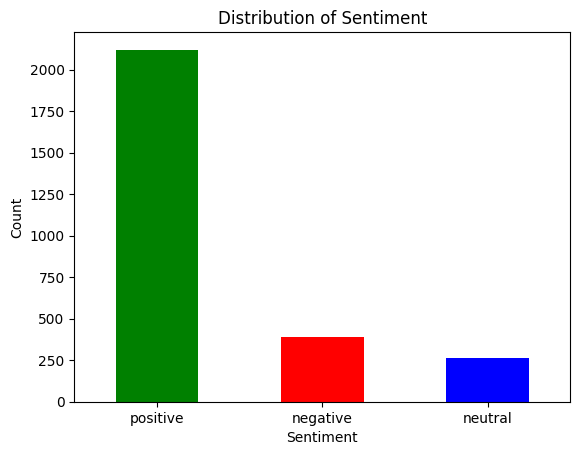

In [ ]:
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])   #representation of no. of pos neg neutral reviews
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
ratings = df["rating"].value_counts()   #pie chart based on ratings
numbers = ratings.index
quantity = ratings.values

figure = px.pie(df, values=quantity, names=numbers,hole = 0.5)
figure.update_layout(autosize=False, width=500, height=500)
figure.show()

In [ ]:
# Create word clouds for positive and negative reviews
from wordcloud import WordCloud
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'])

In [ ]:
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)


(-0.5, 799.5, 399.5, -0.5)

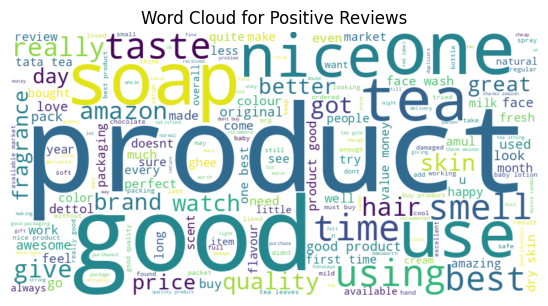

In [ ]:
plt.figure(figsize=(15, 6))    #positive review word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

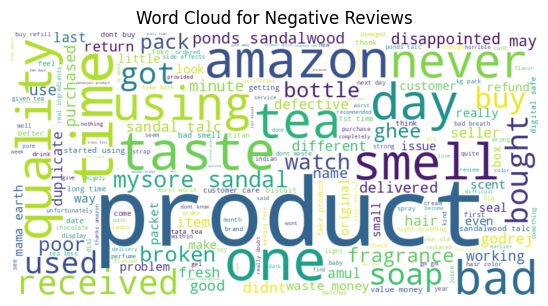

In [ ]:
plt.figure(figsize=(15, 6))    #negative review word cloud
plt.subplot(1, 2, 1)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

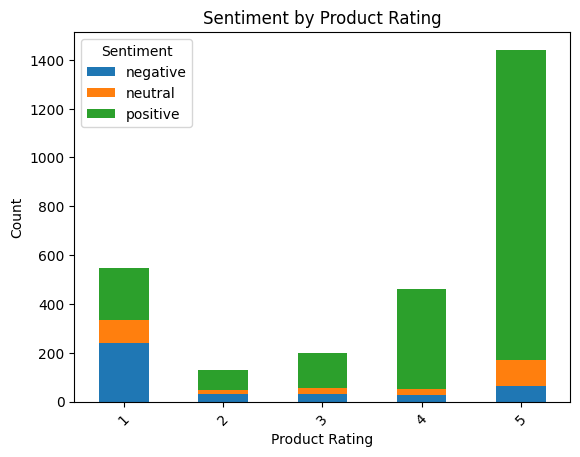

In [ ]:
# Compare sentiment across product categories
rating_sentiment_counts = df.groupby('rating')['sentiment'].value_counts().unstack().fillna(0)
rating_sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Sentiment by Product Rating')
plt.xlabel('Product Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


## **Classification Model Creation**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_counts, y_train)

# Predict sentiment on the test set
y_pred = classifier.predict(X_test_counts)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('---------------------------------------------------------------')
# Evaluation of  the model using various values
print(classification_report(y_test, y_pred))


Accuracy: 0.8974820143884892
---------------------------------------------------------------
              precision    recall  f1-score   support

    negative       0.84      0.70      0.76        73
     neutral       0.90      0.55      0.68        51
    positive       0.91      0.97      0.94       432

    accuracy                           0.90       556
   macro avg       0.88      0.74      0.79       556
weighted avg       0.90      0.90      0.89       556



## **Top 10 product recommendations based on sentiment analysis**

In [ ]:
# Aggregate sentiment scores for each product
product_sentiment = df.groupby('name')['sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Calculate overall sentiment score for each product (you can customize the aggregation method as needed)
product_sentiment['overall_sentiment_score'] = product_sentiment['positive'] - product_sentiment['negative']

# Rank products by sentiment score
product_sentiment_ranked = product_sentiment.sort_values(by='overall_sentiment_score', ascending=False)

# Filter and recommend top-ranked products with positive sentiments
top_positive_products = product_sentiment_ranked.head(10).index.tolist()

# Print the top 10 recommended products with positive sentiments
print("Top 10 Recommended Products with Positive Sentiments:")
print(top_positive_products)


Top 10 Recommended Products with Positive Sentiments:
['Fastrack-Analog-Womens-6150SM04-NK6150SM04', 'Dettol-Disinfectant-Liquid-Menthol-Cool', 'Indiana-Frutti-Cherries-Frooti-Multicolor', 'Amul-Cow-Ghee-500ml', 'Amul-Fresh-Cream-250ml', 'Amul-Fresh-Paneer-200g', 'Himalaya-Herbals-Anti-Wrinkle-Cream', 'Titan-Analog-Gold-Dial-Watch-NK1650YM04', 'Titan-Analog-Black-Dial-Watch-NK1730SL02', 'Tata-Tea-Premium-1-5kg']


## **Recommendation system of products based on input using the ratings**

In [ ]:
def recommend_product(category):
    # Filter dataset for the specified category
    category_df = df[df['name'].str.contains(category, case=False)]

    if category_df.empty:
        return "No products found for the specified category."

    # Calculate average rating for each product
    avg_ratings = category_df.groupby(['brandName', 'name']).agg({'rating': 'mean'}).reset_index()

    # Find product with the highest average rating
    highest_rated_product = avg_ratings.loc[avg_ratings['rating'].idxmax()]

    # Extract brand name and product name
    recommended_brand = highest_rated_product['brandName']
    recommended_product = highest_rated_product['name']

    return f"Recommended product: {recommended_product} by {recommended_brand} (Average Rating: {highest_rated_product['rating']})"

# Example usage:
input_category = input("Enter the product you want:- ")
recommendation = recommend_product(input_category)
print(recommendation)

Enter the product you want:- soap
Recommended product: Cinthol-Lime-Soap-100g-Pack by Cinthol (Average Rating: 4.8)
